Dataset is available at: https://www.kaggle.com/uciml/sms-spam-collection-dataset

#Downloading necessary Libraries

In [ ]:
!pip install scikit-learn nltk
!pip install matplotlib


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix



# Load the dataset and Convert labels to binary




In [18]:

data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

data['label'] = data['label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)


# Text preprocessing

In [19]:

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


# Train a Naive Bayes classifier and Make predictions on the test set

In [20]:

classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

predictions = classifier.predict(X_test_vectorized)

# Evaluate the classifier

In [21]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.9838565022421525
Confusion Matrix:
[[963   2]
 [ 16 134]]



# Visualize the data

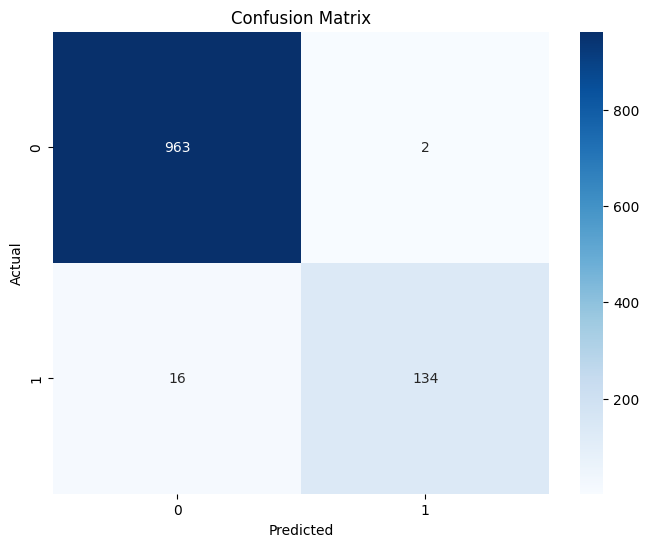

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



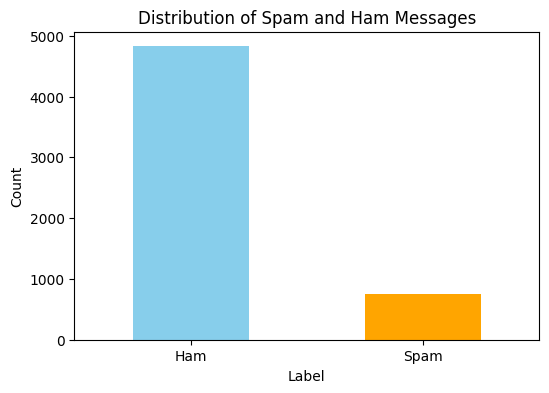

In [31]:
plt.figure(figsize=(6, 4))
data['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Distribution of Spam and Ham Messages")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['Ham', 'Spam'], rotation=0)
plt.show()


#Use Our trained classifier to classify sentence as either not spam or spam

In [25]:
def classify_message(message):
    message_vectorized = vectorizer.transform([message])
    prediction = classifier.predict(message_vectorized)
    return "spam" if prediction[0] == 1 else "not-spam"

#Spam Example

In [26]:

new_message = "Congratulations, you've won a free gift!"
result = classify_message(new_message)
print(f"The message is classified as: {result}")


The message is classified as: spam


#Not Spam Example

In [27]:


new_message = "Hello, I hope you're having a great day and enjoying the beautiful weather!"
result = classify_message(new_message)
print(f"The message is classified as: {result}")


The message is classified as: not-spam
